In [15]:
bit_string=input('Enter a bit string: ')
system_size=len(bit_string)
print('Input string: '+bit_string)

Input string: 01101


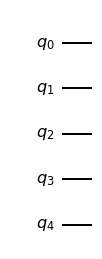

In [16]:
from qiskit import QuantumCircuit
oracle=QuantumCircuit(system_size)
oracle.draw('mpl')

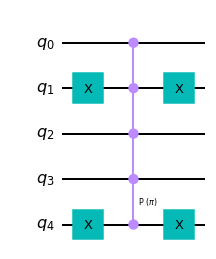

In [17]:

import math

qubits_to_flip=[]
control_qubits=[i for i in range(system_size-1)]
target_qubit=system_size-1

for i in range(system_size):
    if bit_string[i]=='0':
        qubits_to_flip.append(system_size-1-i)
if qubits_to_flip:        
    oracle.x(qubits_to_flip)
oracle.mcp(math.pi,control_qubits,target_qubit)
if qubits_to_flip:        
    oracle.x(qubits_to_flip)

oracle.draw('mpl')

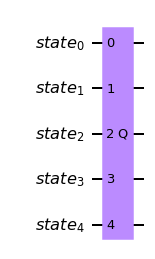

In [18]:
from qiskit.circuit.library import GroverOperator
grover=GroverOperator(oracle)
grover.draw('mpl')

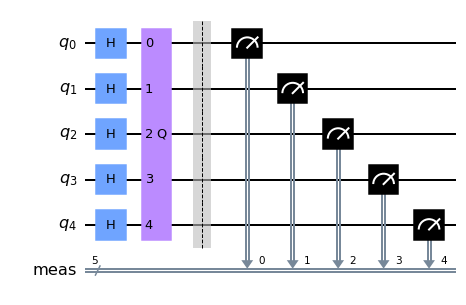

In [19]:
init=QuantumCircuit(system_size)
init.h([i for i in range(system_size)])
qc=init.compose(grover)
qc.measure_all()
qc.draw('mpl')

In [20]:
from qiskit_aer import AerSimulator
from qiskit import transpile
sim=AerSimulator()
t_qc=transpile(qc,sim)

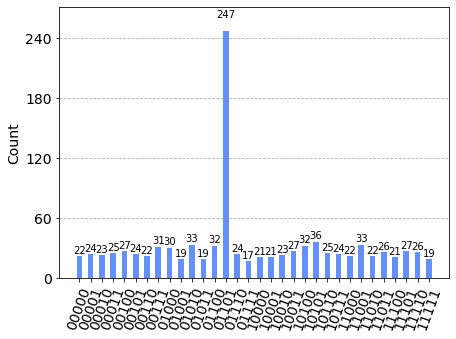

In [21]:
from qiskit.visualization import plot_histogram
plot_histogram(sim.run(t_qc).result().get_counts())